# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [89]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
mars_data_df = pd.read_html(url)[0]

In [91]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [93]:
# Find the table in the HTML content
table = soup.find('table')
# Extract all rows of data
for row in table.find_all('tr'):
    # Extract all cells in the row
    cells = row.find_all('td')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [96]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    # Extract all cells in the row
    cells = row.find_all('td')

In [98]:

    # Check if row contains data cells
    if len(cells) > 0:
        # Extract text from each cell
        row_data = [cell.get_text(strip=True) for cell in cells]
        
        # Add the row data to the list
        data_list.append(row_data)

# Define the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [100]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(data_list, columns=column_names)

In [130]:
# Create a Pandas DataFrame
mars_data_df = pd.DataFrame(data_list, columns=column_names)
# Confirm DataFrame was created successfully
print(mars_data_df.head())

     id terrestrial_date   sol   ls month min_temp pressure
0  1895       2018-02-27  1977  135     5    -77.0    727.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [105]:
# Examine data type of each column
print(mars_data_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [107]:
# Change data types for data analysis
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['id'] = mars_data_df['id'].astype(int)
mars_data_df['sol'] = mars_data_df['sol'].astype(int)
mars_data_df['ls'] = mars_data_df['ls'].astype(float)
mars_data_df['month'] = mars_data_df['month'].astype(int)
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)


In [109]:
# Confirm type changes were successful by examining data types again
print(mars_data_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [132]:
# 1. How many months are there on Mars?
num_months_mars=12
print(num_months_mars)

12


In [138]:
# 2. How many sols (Martian days) worth of data are there?
mars_data_df = pd.read_html(url)[0]
# Number of unique sols
num_sols = mars_data_df['sol'].nunique()
print(num_sols) 


1867


In [140]:
import matplotlib.pyplot as plt

In [142]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean()

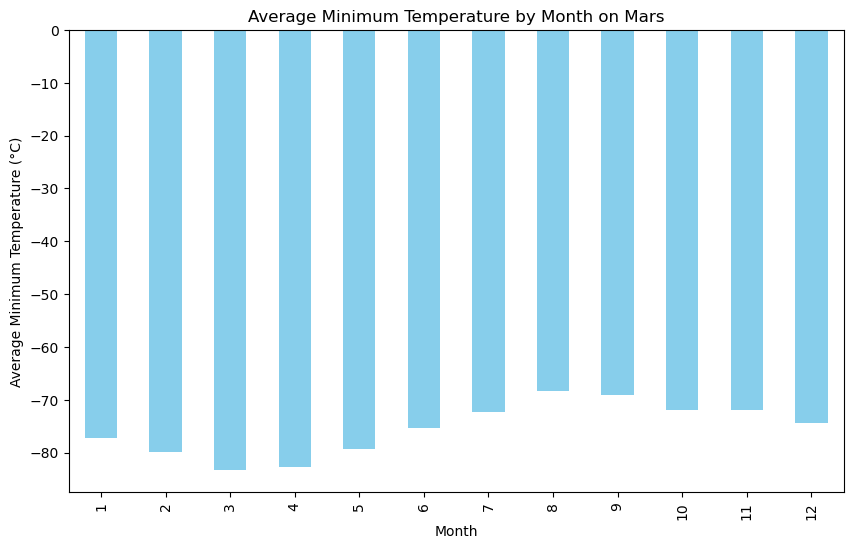

In [146]:
# Plot the average minimum temperature by month
# Plotting the data
avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()


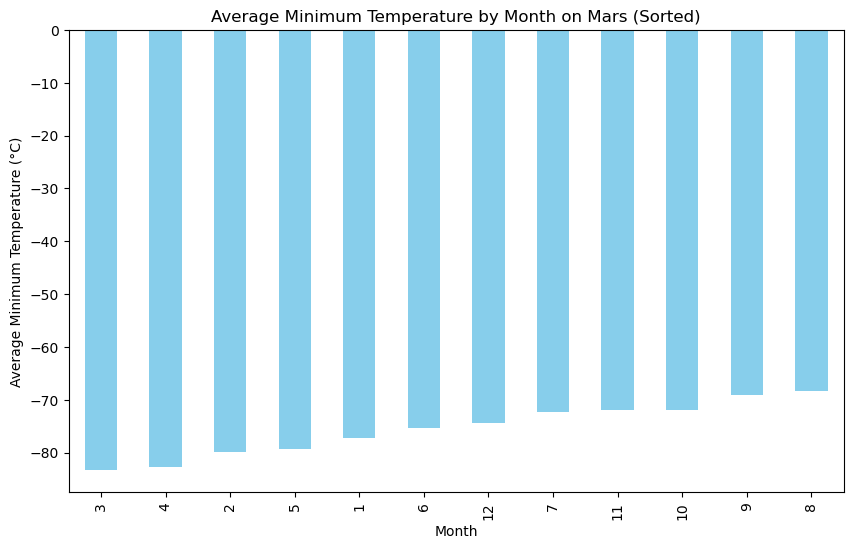

In [148]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature by month
sorted_avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars (Sorted)')
plt.show()

In [150]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


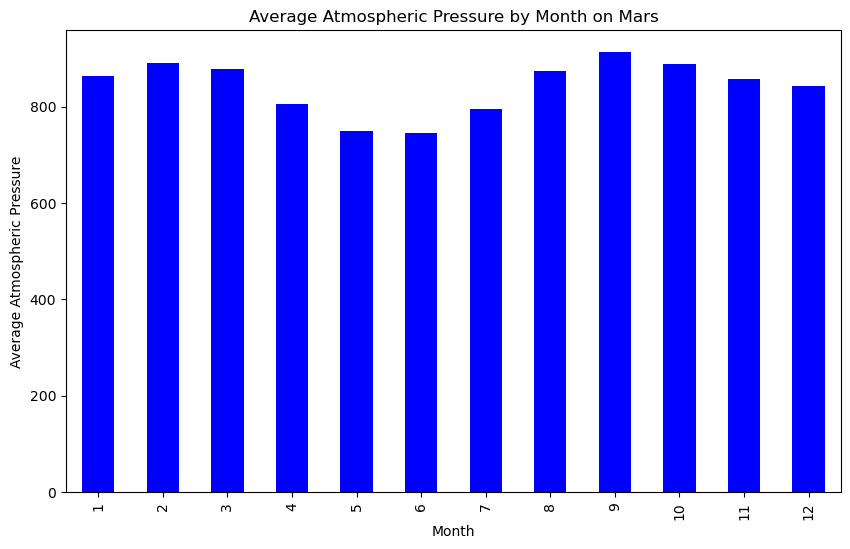

In [154]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10, 6), color='blue')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show()

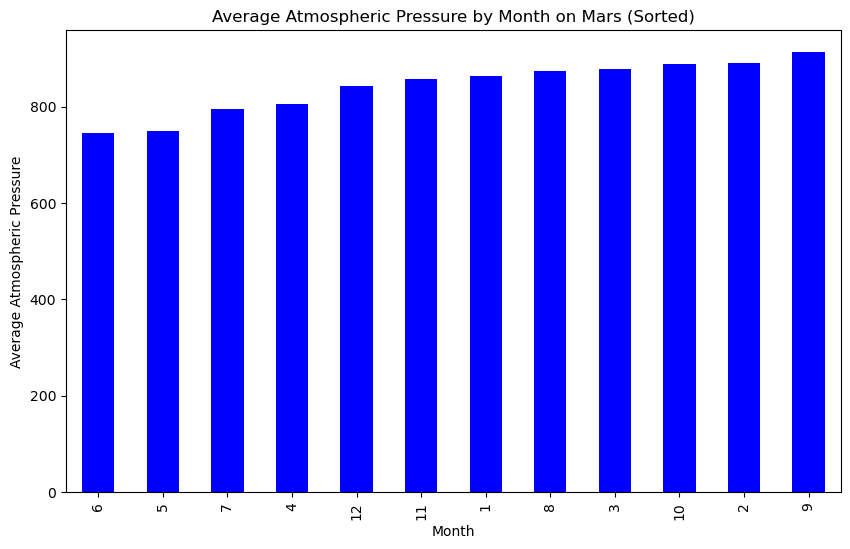

In [158]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Calculate the average pressure by month
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

# Sort the average pressure by month
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the sorted average pressure by month as a blue bar chart
sorted_avg_pressure_by_month.plot(kind='bar', figsize=(10, 6), color='blue')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted)')
plt.show()

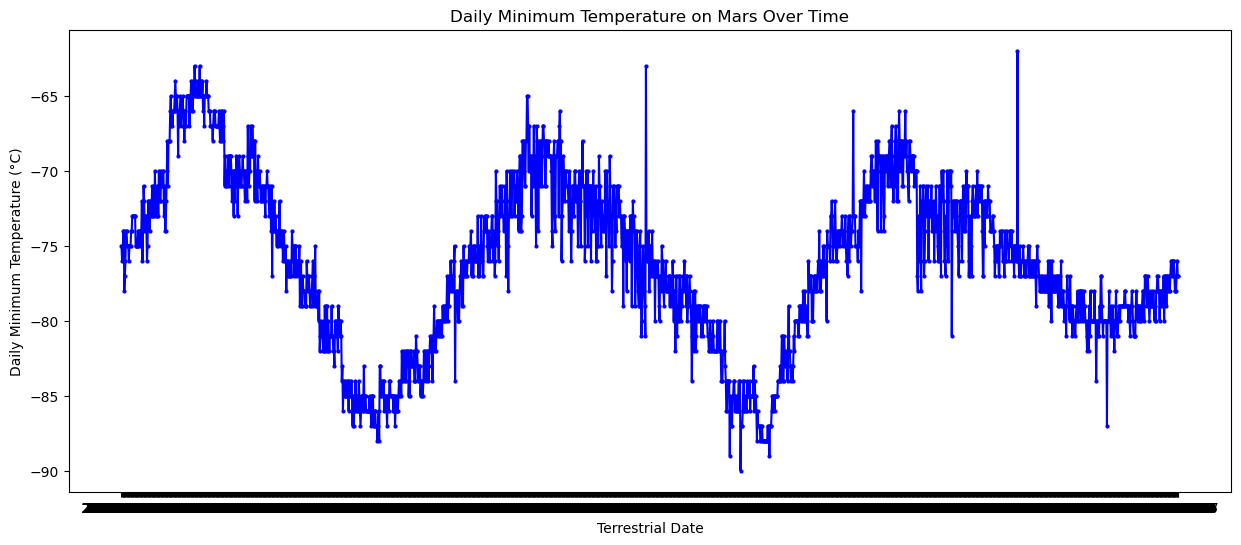

In [160]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot daily minimum temperature over time
plt.figure(figsize=(15, 6))
plt.plot(mars_data_df['terrestrial_date'], mars_data_df['min_temp'], marker='o', linestyle='-', color='blue', markersize=2)
plt.xlabel('Terrestrial Date')
plt.ylabel('Daily Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

In [ ]:
# The minimum temperature on Mars varies greatly due to its thin atmosphere, which does not retain heat well. Based on the data, you can calculate the average minimum temperature for different months and identify the coldest and warmest months.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [ ]:
# Atmospheric pressure on Mars is much lower than on Earth, averaging about 610 Pascals (very low pressure), which is less than 1% of Earth's average pressure at sea level (101.3 Pascals). The atmospheric pressure on Mars can vary significantly due to changes in altitude and weather conditions. By analyzing the data, you can identify months with the highest and lowest average atmospheric pressure.

#### Year Length

YOUR ANALYSIS HERE

In [165]:
# A Martian year is the period Mars takes to complete one orbit around the Sun. It is equivalent to about 687 Earth days. By plotting the daily minimum temperature over time, you can visually estimate the length of a Martian year by identifying the repeating patterns in temperature cycles.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [167]:
# Write the data to a CSV
csv_file_path = 'mars_data.csv'
mars_data_df.to_csv(csv_file_path, index=False)

print(f"Data has been written to {csv_file_path}")



Data has been written to mars_data.csv


In [169]:
browser.quit()